# 1 - Introduction

In this notebook, I will review the [Danish Fungi 2020](https://arxiv.org/abs/2103.10107) dataset that will be used as the basis for the mushroom classification task. According to the authors of the publication (Picek et al., 2021):

> "The Danish Fungi 2020 (DF20) dataset contains image observations from the Atlas of Danish Fungi belonging to species with more than 30 images. The data are observations collected before the end of 2020, originating from 30 countries, and including samples from all seasons. It consists of 295,938 images belonging to 1,604 species mainly from the Fungi kingdom --"

For starters, I want to point out that finding such a strong base dataset is truly a luxury. The dataset is [openly available](https://sites.google.com/view/danish-fungi-dataset) and it is clean and well-documented. Hence, the main focus of this EDA will be verifying that the loaded dataset matches the description in the publication and exploring the data distribution of the 26 classes, that the model should identify.

The primary questions that this EDA will seek answers for are:
* How many out of the 26 mushroom classes are present in the raw dataset?
* Are the classes balanced, i.e. does each class have roughly the same amount of data?

Based on the results, I will decide which classes should be supplemented with external data.

# 2 - Analysis

Define imports and paths

In [1]:
import os
import pathlib
from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# The dataset is already split into train and test sets
path_train_metadata = pathlib.Path("../data/00_raw/DF20-train_metadata_PROD.csv")
path_test_metadata = pathlib.Path("../data/00_raw/DF20-public_test_metadata_PROD.csv")

# Path to the folder with the actual mushroom images
path_image_dataset = pathlib.Path("../data/00_raw/DF20")

# The mushroom classes that the model should identify
path_classes = pathlib.Path("../data/00_external/mushroom_classes.csv")

Load the metadata and the mushroom classes

In [3]:
# Metadata
df_train_metadata = pd.read_csv(path_train_metadata)
df_test_metadata = pd.read_csv(path_test_metadata)

# Classes
df_classes = pd.read_csv(path_classes)

Check the metadata contents

In [4]:
df_train_metadata.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Gid,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path
0,2238546328,2018-04-16T00:00:00,2018.0,4.0,16.0,DK,Ulvedal Plantage,30872.0,Ramalina farinacea (L.) Ach.,Fungi,...,DNK.2.19_1,Viborg,2238546328-30620,bark of living trees,Ulfva Melchior Hvidegaard,56.299706,9.258110,50.0,Mixed woodland (with coniferous and deciduous ...,2238546328-30620.JPG
1,2558871973,2020-01-03T00:00:00,2020.0,1.0,3.0,DK,Slotshegn,15256.0,Hysterium acuminatum Fr.,Fungi,...,DNK.1.11_1,Frederikssund,2558871973-53941,dead wood (including bark),Ole Martin,55.861899,11.975973,50.0,Deciduous woodland,2558871973-53941.JPG
2,2238503501,2017-08-22T00:00:00,2017.0,8.0,22.0,DK,Petersborg Strandenge,61200.0,Gliophorus perplexus (A.H.Sm. & Hesler) Kovalenko,Fungi,...,DNK.3.11_1,Vesthimmerland,2238503501-245559,soil,Per Taudal Poulsen,56.975158,9.285525,75.0,natural grassland,2238503501-245559.JPG
3,2446759075,2019-10-26T00:00:00,2019.0,10.0,26.0,DK,Klintebjerg,30530.0,Lecidella scabra (Taylor) Hertel & Leuckert,Fungi,...,DNK.4.10_1,Odsherred,2446759075-197643,stone,Susanne Rabenborg,55.960242,11.583103,15.0,gravel or clay pit,2446759075-197643.JPG
4,2238472345,2016-08-21T00:00:00,2016.0,8.0,21.0,DK,Blåbjerg,63728.0,"Russula fragilis Fr., 1838",Fungi,...,DNK.5.20_1,Varde,2238472345-167057,soil,Tom Smidth,55.742985,8.250188,50.0,Mixed woodland (with coniferous and deciduous ...,2238472345-167057.JPG


In [5]:
df_train_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266344 entries, 0 to 266343
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gbifID                266344 non-null  int64  
 1   eventDate             266328 non-null  object 
 2   year                  266328 non-null  float64
 3   month                 266328 non-null  float64
 4   day                   266328 non-null  float64
 5   countryCode           266344 non-null  object 
 6   locality              266273 non-null  object 
 7   taxonID               266344 non-null  float64
 8   scientificName        266344 non-null  object 
 9   kingdom               266344 non-null  object 
 10  phylum                266344 non-null  object 
 11  class                 266315 non-null  object 
 12  order                 266187 non-null  object 
 13  family                263975 non-null  object 
 14  genus                 266344 non-null  object 
 15  

In [6]:
df_test_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29594 entries, 0 to 29593
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gbifID                29594 non-null  int64  
 1   eventDate             29593 non-null  object 
 2   year                  29593 non-null  float64
 3   month                 29593 non-null  float64
 4   day                   29593 non-null  float64
 5   countryCode           29594 non-null  object 
 6   locality              29584 non-null  object 
 7   taxonID               29594 non-null  float64
 8   scientificName        29594 non-null  object 
 9   kingdom               29594 non-null  object 
 10  phylum                29594 non-null  object 
 11  class                 29591 non-null  object 
 12  order                 29577 non-null  object 
 13  family                29330 non-null  object 
 14  genus                 29594 non-null  object 
 15  specificEpithet    

At a first look, the metadata seems clean, as expected, but some of the columns have missing values. Both the train and the test metadata have similar contents. According to the publication, the training set should contain 90 % of the images and there should be a total of 295,938 images belonging to 1,604 classes. Let's verify this quickly.

In [7]:
# Number of images from the ID column with no missing values
n_train_images = df_train_metadata['gbifID'].shape[0]
n_test_images = df_test_metadata['gbifID'].shape[0]

print(f"The training set contains {(n_train_images / (n_train_images + n_test_images)) * 100:.2f} % of the images.")
print(f"The total number of images listed in the metadata is: {n_train_images + n_test_images}")
print(f"The number of classes in the metadata is: {df_train_metadata['scientificName'].nunique()}\n")

The training set contains 90.00 % of the images.
The total number of images listed in the metadata is: 295938
The number of classes in the metadata is: 1604



Seems like we downloaded the right dataset. That's always a good start. Let's check that the images are actually present in their directory.

In [8]:
print(f"Number of files present in the DF20 directory: {len(os.listdir(path_image_dataset))}")
print(f"Number of JPEG images present in the DF20 directory: {len(list(path_image_dataset.glob('*.JPG')))}\n")

Number of files present in the DF20 directory: 372179
Number of JPEG images present in the DF20 directory: 372179



This is peculiar. There are nearly 80,000 "extra" images in the directory. Since the dataset authors did not supply a MD5 or SHA sum for hash checking the tar.gz file, which contained the images, it's hard to tell if the extra images are intended or not. In any case, we certainly don't mind extra data - it feels like early Christmas! Let's just verify that the images are not duplicates.

Duplicate images have similar file sizes, so let's start with a light operation that checks how many images have unique sizes. This should give a rough idea of how many duplicates we can expect.

In [9]:
# Initialize a list for the file sizes
file_sizes = []

# Loop through the files in the image directory
for filename in os.listdir(path_image_dataset):
    # Calculate file sizes and add them to list
    file_sizes.append(os.path.getsize(str(path_image_dataset / filename)))
    
print(f"Total number of file sizes: {len(file_sizes)}")
print(f"Number of unique file sizes: {pd.Series(file_sizes).nunique()}")
print(f"Number of images in the metadata: {n_train_images + n_test_images}\n")

Total number of file sizes: 372179
Number of unique file sizes: 293555
Number of images in the metadata: 295938



Looks like we shouldn't celebrate Christmas quite yet. The number of unique file sizes is very close to the number of images listed in the metadata. There are ~2500 unique-sized files less, but some images could randomly have the same size, since the numbers are quite high. In any case, the result suggests that most of the extra files are duplicates.

I should do a separate analysis to verify this result and investigate the assumed duplicates further, but this is enough for now. Let's continue the EDA by checking some of the images described in the metadata.

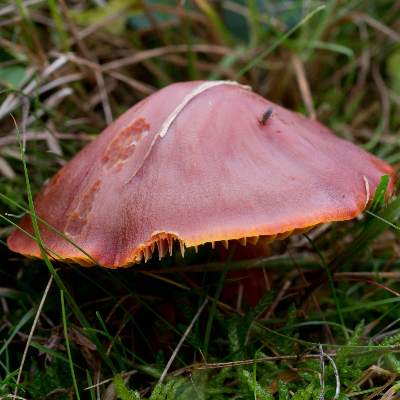

In [10]:
# Display a random training image
img = Image.open(path_image_dataset / df_train_metadata["image_path"][123])
img = img.resize((int(img.size[0] / 3), int(img.size[1] / 3)), Image.NEAREST)
img

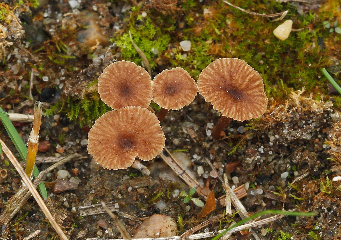

In [11]:
# Display a random test image
img = Image.open(path_image_dataset / df_test_metadata["image_path"][666])
img = img.resize((int(img.size[0] / 3), int(img.size[1] / 3)), Image.NEAREST)
img

They do indeed look like mushrooms. That's great. We should verify that all of the images for the chosen classes can be opened, i.e. none of them are corrupted, but I'll pass on it in this EDA and do it at a later stage before transferring the class images from *raw* to *interim*.

Next, let's extract the classes we are interested in and check their distributions.

In [12]:
def count_classes(df_metadata, df_classes):

    # Initialize list for tracking counts of each class
    class_counts = []

    # Calculate counts for each class
    for cls in df_classes["species"]:
        class_mask = df_metadata['scientificName'].str.contains(cls)
        class_counts.append(class_mask.sum())

    # Create a dataframe with counts for each class
    df_class_counts = pd.DataFrame({"class_name":df_classes["species"], 
                                    "finnish_name": df_classes["finnish_name"], 
                                    "counts":class_counts})
    
    return df_class_counts

In [13]:
# Count the number of images for each class in the train and test sets
df_train_class_counts = count_classes(df_train_metadata, df_classes)
df_test_class_counts = count_classes(df_test_metadata, df_classes)

In [14]:
# Statistics for train set class counts
df_train_class_counts.describe()

,counts
count,26.000000
mean,215.615385
std,187.482709
min,0.000000
25%,66.750000
50%,216.500000
75%,315.000000
max,811.000000


In [15]:
# Statistics for test set class counts
df_test_class_counts.describe()

,counts
count,26.000000
mean,23.961538
std,20.806693
min,0.000000
25%,7.500000
50%,24.000000
75%,34.750000
max,90.000000


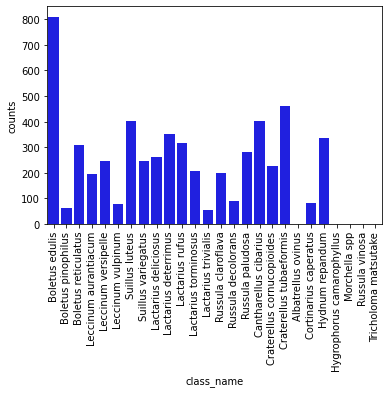

In [16]:
# Interactive figure for exploration
# px.bar(df_train_class_counts, x="class_name", y="counts", title="Training data class distribution", hover_name="finnish_name")
# Static figure for GitHub display
sns.barplot(x="class_name", y="counts", data=df_train_class_counts, color="b")
_ = plt.xticks(rotation=90)

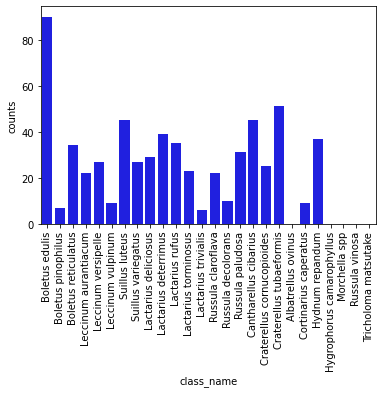

In [17]:
# Interactive figure for exploration
# px.bar(df_test_class_counts, x="class_name", y="counts", title="Test data class distribution", hover_name="finnish_name")
# Static figure for GitHub display
sns.barplot(x="class_name", y="counts", data=df_test_class_counts, color="b")
_ = plt.xticks(rotation=90)

The good news is that the dataset covers most of the classes, and the training and test data have a similar distribution. The bad news is that five of the classes are missing from the dataset and the present classes are very imbalanced - while Boletus edulis (Finnish: herkkutatti) has 811 counts in training data, Lactarius trivialis (haaparousku) only has 55.

# 3 - Discussion

The main outcomes from this EDA are:

1. In the raw dataset directory, there are nearly 80,000 "extra" images that have not been marked in the metadata. It seems likely that most or all of the extra images are duplicates.
2. The dataset contains data for 21 out of 26 mushroom classes. The missing classes are:
    - Albatrellus ovinus (lampaankääpä)
    - Hygrophorus camarophyllus (mustavahakas)
    - Morchella spp. (huhtasienet)
    - Russula vinosa (viinihapero)
    - Tricholoma matsutake (tuoksuvalmuska)
3. The training and test sets have a similar, highly imbalanced, distribution for the 21 classes.

Point 1 will be investigated more in a later analysis. It should not stop me from using the images that have been marked in the metadata.

Point 2 is overall very positive, since I already have some data for the majority of the classes. The missing classes are generally more rare in Finnish nature than the present ones. I will do some web-scraping at a later point to add data for the missing classes.

Point 3 was to be expected, since the Danish Fungi 2020 authors mentioned that the overall class distribution is long-tailed. Nevertheless, I will be able to start training models with the dataset, but I should keep in mind that the models will be better at recognizing the highly presented classes. Consequently, accuracy should not be the only metric of success, but I should also consider monitoring top-k accuracy, precision, recall and/or macro-averaged F1 score. I will make the distribution more balanced in the future by scraping data for the low-count classes.

All in all, while most of the classes could use more data, the raw dataset is good enough for building a baseline model. Hence, we can already start developing the rest of the modeling framework.